In [55]:
import pandas as pd
import geopandas as gpd
import rasterio
import numpy as np
from osgeo import gdal
import os
import xarray as xr
import rioxarray
import geopandas as gpd
from rasterstats import zonal_stats



In [56]:
def geotiff_to_xyz_geopandas_rioarray(inputfile):

    xds = rioxarray.open_rasterio(inputfile)
    xds = xds.squeeze().drop("spatial_ref").drop("band")
    xds.name = "data"
    df = xds.to_dataframe().reset_index()

    return df


<Axes: >

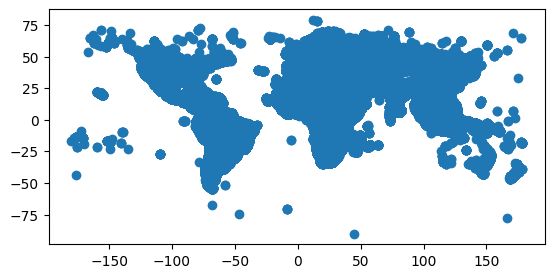

In [57]:
acled = pd.read_parquet("/DATA/REFERENCE_DATASETS/ACLED/raw_ACLED.parquet.gzip")
acled = gpd.GeoDataFrame(
    acled, geometry=gpd.points_from_xy(acled.LONGITUDE, acled.LATITUDE), crs="EPSG:4326"
)
acled.plot()

<Axes: >

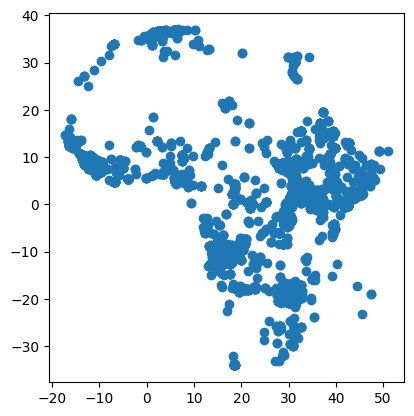

In [58]:
acled = acled.loc[acled.YEAR==2000]
acled.plot()

In [59]:
acled = acled.loc[acled.YEAR==2000]
acled=acled.to_crs(epsg=3857)
acled['geometry'] = acled.geometry.buffer(8000)
acled.reset_index(inplace = True, drop = True)

In [60]:
stats = gpd.GeoDataFrame(zonal_stats(acled, f"/DATA/REFERENCE_DATASETS/POPULATION/LANDSCAN/EPSG3857/landscan-global-2000_EPSG3857.tif", stats=["sum"]))
stats.shape

(4175, 1)

In [61]:
acled_joined= acled.join(stats)

In [62]:
acled_joined.loc[acled_joined["sum"]<acled_joined["FATALITIES"]]

,EVENT_ID_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,DISORDER_TYPE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,...,NOTES,FATALITIES,TAGS,TIMESTAMP,MAX_PAGE,COUNT,COUNTRY3C,ISO3C,geometry,sum
1869,CHA48,2000-07-17,2000,1,Political violence,Battles,Non-state actor overtakes territory,MDJT: Movement for Democracy and Justice in Chad,,2,...,Fatalities: 240 govt troops,240,,1619479596,380,1,Chad,TCD,"POLYGON ((1900542.663 2434617.816, 1900504.141...",39.0
2290,ANG2295,2000-06-15,2000,3,Political violence,Violence against civilians,Attack,Military Forces of Angola (1975-),,1,...,FAA kills Mbukushu speaking women and children...,14,,1622068219,380,1,Angola,AGO,"POLYGON ((2035862.636 -1901428.779, 2035824.11...",6.0
2846,ANG2272,2000-05-10,2000,3,Political violence,Explosions/Remote violence,Remote explosive/landmine/IED,Military Forces of Angola (1975-),,1,...,The conflict along the Namibian border has cla...,300,,1622068219,380,1,Angola,AGO,"POLYGON ((2531234.370 -1979106.500, 2531195.84...",25.0
3008,CHA44,2000-04-28,2000,1,Political violence,Battles,Armed clash,MDJT: Movement for Democracy and Justice in Chad,,2,...,MDJT attacks a military post near the Wour oas...,25,,1619479597,380,1,Chad,TCD,"POLYGON ((1783545.878 2433661.616, 1783507.356...",10.0
3122,ANG2256,2000-04-14,2000,2,Political violence,Violence against civilians,Attack,Military Forces of Angola (1975-),,1,...,"At Kanfunfo diamond area, FAA and National pol...",300,,1622068219,380,1,Angola,AGO,"POLYGON ((2011750.834 -960962.763, 2011712.312...",260.0
3523,CHA43,2000-03-01,2000,2,Political violence,Battles,Armed clash,MDJT: Movement for Democracy and Justice in Chad,,2,...,Fatalities: 197 soldiers,197,,1619479596,380,1,Chad,TCD,"POLYGON ((2410397.063 1942417.409, 2410358.541...",6.0
4161,CON214,2000-01-01,2000,1,Political violence,Battles,Armed clash,MLC: Movement for the Liberation of Congo,,2,...,Government soldiers reportedly came to Libanda...,80,,1585691842,380,1,"Congo, Rep.",COG,"POLYGON ((2056278.631 393206.637, 2056240.108 ...",40.0
